In [1]:
import numpy as np
import spacy
import nltk
import svgling
import seaborn as sns
import matplotlib.pyplot as plt
from complete_class import CompleteNER

In [2]:
nltk.download('conll2002')
from nltk.corpus import conll2002

# Spanish
train_esp = conll2002.iob_sents('esp.train') # Train
val_esp = conll2002.iob_sents('esp.testa') # Val
test_esp = conll2002.iob_sents('esp.testb') # Test
# Dutch
train_ned = conll2002.iob_sents('ned.train') # Train
val_ned = conll2002.iob_sents('ned.testa') # Val
test_ned = conll2002.iob_sents('ned.testb') # Test

[nltk_data] Downloading package conll2002 to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2002 is already up-to-date!


In [19]:
spanish = CompleteNER(train_esp, val_esp, test_esp, language="esp", postag=True, method="bios")

In [20]:
features = {
			'CAPITALIZATION': True,
			'HAS_UPPER': True,
			'HAS_NUM': True,
			'PUNCTUATION': True,
			'SUF': True,
            'PRE': True,
            '2NEXT': True,
            '2PREV': True,
			'WORD': True,
			'LEN': True,
			'NEXT': True,
			'POS': True,
			'LEMMA': True,
			'CITY': True,
			'COMPANY': True,
			'CELEBRITY': True,
			'RESEARCH_ORGANIZATION': True,
			'NAME': True,
			'SURNAME': True,
			'PREV': True,
			'NEXT': True,
			'NUMBER': True,
			'GENDER': True,
			'PERSON': True,
			'PRONTYPE': True,
			'DEP': True,
			'HEAD_DISTANCE': True,
			'HEAD': True
		}

In [21]:
spanish.train(verbose=True, file="spanish_bios.mdl", feature_opt=features)

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 220862
Seconds required: 0.961

L-BFGS optimization
c1: 0.000000
c2: 1.000000
num_memories: 6
max_iterations: 2147483647
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 161437.614114
Feature norm: 1.000000
Error norm: 141683.420597
Active features: 220862
Line search trials: 1
Line search step: 0.000003
Seconds required for this iteration: 0.348

***** Iteration #2 *****
Loss: 111215.038820
Feature norm: 1.686699
Error norm: 49139.806745
Active features: 220862
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.153

***** Iteration #3 *****
Loss: 98528.412374
Feature norm: 1.855834
Error norm: 41743.723420
Active features: 220862
Line search trials: 1
Line search step: 1.000000
Second

In [22]:
spanish.test(verb=True, plot=True)

In [4]:
spanish.load_from_file("model.mdl")

In [10]:
spanish.validation()

Sentence index: 4
GOLD sentence:  [('"', 'O'), ('Telefónica', 'B-ORG'), ('asumió', 'O'), ('un', 'O'), ('compromiso', 'O'), ('con', 'O'), ('Brasil', 'B-LOC'), (',', 'O'), ('y', 'O'), ('en', 'O'), ('especial', 'O'), ('con', 'O'), ('Sao', 'B-LOC'), ('Paulo', 'I-LOC'), ('en', 'O'), ('1998', 'O'), ('(', 'O'), ('año', 'O'), ('de', 'O'), ('privatización', 'O'), ('del', 'O'), ('sistema', 'O'), ('Telebras', 'B-MISC'), (')', 'O'), ('y', 'O'), ('estamos', 'O'), ('aquí', 'O'), ('para', 'O'), ('prestar', 'O'), ('cuentas', 'O'), ('"', 'O'), (',', 'O'), ('dijo', 'O'), ('Ferreira', 'B-PER'), ('en', 'O'), ('el', 'O'), ('acto', 'O'), ('de', 'O'), ('instalación', 'O'), ('de', 'O'), ('la', 'O'), ('línea', 'O'), ('número', 'O'), ('tres', 'O'), ('millones', 'O'), ('de', 'O'), ('la', 'O'), ('gestión', 'O'), ('de', 'O'), ('Telefónica', 'B-ORG'), ('.', 'O')]
PRED sentence:  [('"', 'O'), ('Telefónica', 'B-ORG'), ('asumió', 'O'), ('un', 'O'), ('compromiso', 'O'), ('con', 'O'), ('Brasil', 'B-ORG'), (',', 'O'), ('

(0.7558194774346794,
 0.7313261319236957,
 0.7433711015068333,
 2183,
 0.9587513935340022,
 array([[   0.,    0.,    0.,    0.,    0.],
        [  18., 1042.,   32.,  147.,   82.],
        [ 190.,   85.,  597.,  186.,   41.],
        [ 122.,  232.,  249., 2346.,  117.],
        [  48.,  147.,   33.,   75., 1778.]]))

In [13]:
nederlands = CompleteNER(train_ned, val_ned, test_ned, language="ned", postag=True)

In [14]:
nederlands.train(verbose=True, file="nederlands.mdl", feature_opt=features)

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 225672
Seconds required: 0.882

L-BFGS optimization
c1: 0.000000
c2: 1.000000
num_memories: 6
max_iterations: 2147483647
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 213911.042980
Feature norm: 1.000000
Error norm: 192832.293399
Active features: 225672
Line search trials: 1
Line search step: 0.000004
Seconds required for this iteration: 0.409

***** Iteration #2 *****
Loss: 141916.686980
Feature norm: 4.607445
Error norm: 50086.879043
Active features: 225672
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.186

***** Iteration #3 *****
Loss: 66869.704626
Feature norm: 3.858888
Error norm: 33777.994516
Active features: 225672
Line search trials: 2
Line search step: 5.000000
Second

In [15]:
nederlands.validation()

Sentence index: 4
GOLD sentence:  [('De', 'O'), ('gestrande', 'O'), ('Concorde', 'B-MISC'), ('wordt', 'O'), ('nu', 'O'), ('aan', 'O'), ('een', 'O'), ('onderzoek', 'O'), ('onderworpen', 'O'), ('.', 'O')]
PRED sentence:  [('De', 'O'), ('gestrande', 'O'), ('Concorde', 'B-PER'), ('wordt', 'O'), ('nu', 'O'), ('aan', 'O'), ('een', 'O'), ('onderzoek', 'O'), ('onderworpen', 'O'), ('.', 'O')]
ERROR 2 --- Gold: ('Concorde', 'B-MISC') Predicted: ('Concorde', 'B-PER')

Sentence index: 11
GOLD sentence:  [('Later', 'O'), ('op', 'O'), ('zondag', 'O'), ('moest', 'O'), ('een', 'O'), ('Britse', 'B-MISC'), ('Concorde', 'B-MISC'), ('in', 'O'), ('het', 'O'), ('Canadese', 'B-MISC'), ('Gander', 'B-LOC'), ('een', 'O'), ('noodlanding', 'O'), ('maken', 'O'), (',', 'O'), ('omdat', 'O'), ('passagiers', 'O'), ('in', 'O'), ('het', 'O'), ('vliegtuig', 'O'), ('brandstof', 'O'), ('roken', 'O'), ('.', 'O')]
PRED sentence:  [('Later', 'O'), ('op', 'O'), ('zondag', 'O'), ('moest', 'O'), ('een', 'O'), ('Britse', 'B-MISC'

(0.7582636399840701,
 0.72782874617737,
 0.742734542617515,
 1048,
 0.9721920025472974,
 array([[   0.,    0.,    0.,    0.,    0.],
        [  15.,  393.,   24.,   41.,   70.],
        [ 100.,   56.,  692.,   35.,   80.],
        [  86.,   55.,  110.,  672.,  159.],
        [  37.,   26.,   38.,   17., 1008.]]))

Sentence index: 0
GOLD sentence:  [('Dat', 'O'), ('is', 'O'), ('in', 'O'), ('Italië', 'B-LOC'), (',', 'O'), ('Spanje', 'B-LOC'), ('of', 'O'), ('Engeland', 'B-LOC'), ('misschien', 'O'), ('geen', 'O'), ('probleem', 'O'), (',', 'O'), ('maar', 'O'), ('volgens', 'O'), ("'", 'O'), ('Der', 'B-PER'), ('Kaiser', 'I-PER'), ("'", 'O'), ('in', 'O'), ('Duitsland', 'B-LOC'), ('wel', 'O'), ('.', 'O')]
PRED sentence:  [('Dat', 'O'), ('is', 'O'), ('in', 'O'), ('Italië', 'B-LOC'), (',', 'O'), ('Spanje', 'B-LOC'), ('of', 'O'), ('Engeland', 'B-LOC'), ('misschien', 'O'), ('geen', 'O'), ('probleem', 'O'), (',', 'O'), ('maar', 'O'), ('volgens', 'O'), ("'", 'O'), ('Der', 'B-MISC'), ('Kaiser', 'I-MISC'), ("'", 'O'), ('in', 'O'), ('Duitsland', 'B-LOC'), ('wel', 'O'), ('.', 'O')]
ERROR 15 --- Gold: ('Der', 'B-PER') Predicted: ('Der', 'B-MISC')
ERROR 16 --- Gold: ('Kaiser', 'I-PER') Predicted: ('Kaiser', 'I-MISC')

Sentence index: 28
GOLD sentence:  [('Franz', 'B-PER'), ('Beckenbauer', 'I-PER'), (',', 'O'), ('de'

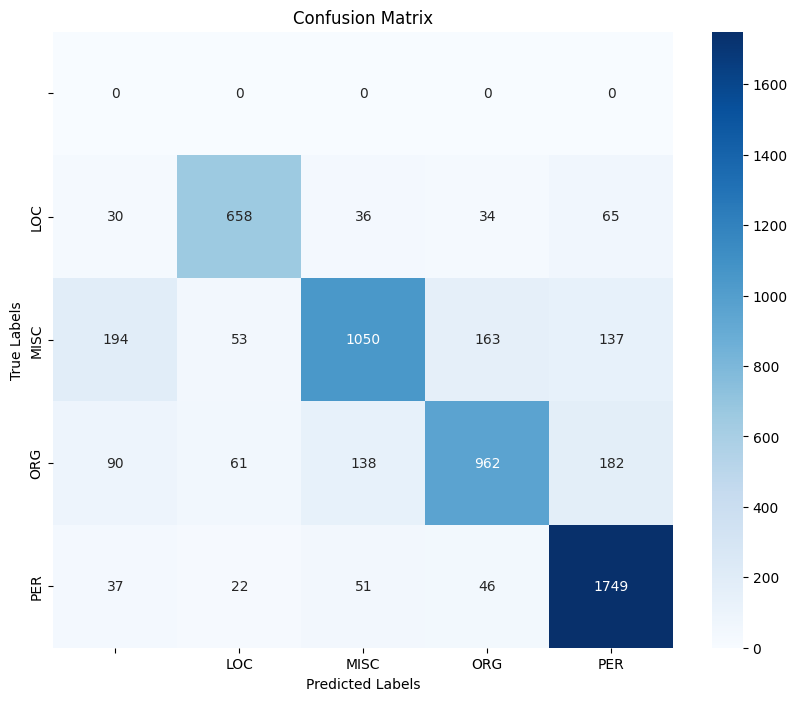

(0.7888100866824271,
 0.7619893428063943,
 0.7751677852348994,
 1520,
 0.9779310344827586,
 array([[   0.,    0.,    0.,    0.,    0.],
        [  30.,  658.,   36.,   34.,   65.],
        [ 194.,   53., 1050.,  163.,  137.],
        [  90.,   61.,  138.,  962.,  182.],
        [  37.,   22.,   51.,   46., 1749.]]))

In [16]:
nederlands.test(verb=True, plot=True)

In [18]:
spanish.tagger.tag(["La", "hija", "de", "el", "Doctor", "Gutiérrez", "se", "casa","en","la","Giralda","de","Sevilla", "con","el","dueño","de", "un", "Peugeot"])

[('La', 'O'),
 ('hija', 'O'),
 ('de', 'O'),
 ('el', 'O'),
 ('Doctor', 'B-PER'),
 ('Gutiérrez', 'I-PER'),
 ('se', 'O'),
 ('casa', 'O'),
 ('en', 'O'),
 ('la', 'O'),
 ('Giralda', 'B-LOC'),
 ('de', 'I-LOC'),
 ('Sevilla', 'I-LOC'),
 ('con', 'O'),
 ('el', 'O'),
 ('dueño', 'O'),
 ('de', 'O'),
 ('un', 'O'),
 ('Peugeot', 'B-MISC')]